# Markowitz Portfolio Theory

## In this notebook, we will use more than 2 assets

### Step 1: Import libraries and read data from yahoo finance
#### 1.1: Import libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline


#### 1.2: Read historical data for 'Apple',  'Walmart' and 'Google' using yahoo finance (from 2014-1-1)

In [2]:
assets = ['AAPL', 'WMT', 'GOOGL'] # define stocks to consider
pf_data = pd.DataFrame() #create a pandas dataframe object

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close'] #read data dynamically from yahoo finance

#### NOTE: Here, we are using Adjusted Close price for our work

### Step 2: Evaluating log returns, expected portfolio return, expected portfolio variance and expected portfolio volatility

#### Approach: We will make portfolios with AAPL and FB stocks having varying percentage/weights in different portfolios in order to evaluate which choice of weights provides optimal portfolio.

#### NOTE: We will do the process for one iteration then for simulate for large number of iterations

#### We will first analyze stock movement

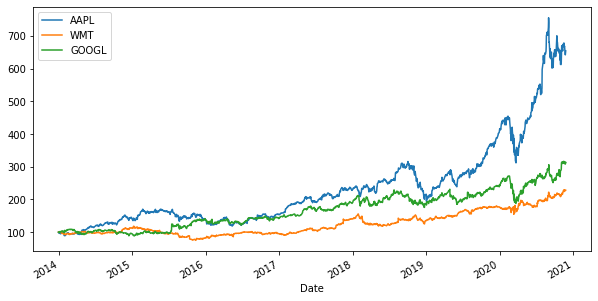

In [3]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) # Normalize the data to have a common starting point anlayze stocks movement

#### 2.1: Calculating Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [4]:
log_returns = np.log(pf_data / pf_data.shift(1)) # calculating log returns 

log_returns.head()

,AAPL,WMT,GOOGL
Date,,,
2013-12-31,NaN,NaN,NaN
2014-01-02,-0.014164,0.002792,-0.006795
2014-01-03,-0.022211,-0.003301,-0.007322
2014-01-06,0.005438,-0.005610,0.011088
2014-01-07,-0.007177,0.003064,0.019095


#### 2.2: Assigning random weights for 2 stocks such that total weight of portfolio is equal to 1

In [5]:
num_assets = len(assets) # count of assets 

weights = np.random.random(num_assets)
weights /= np.sum(weights)
print("Weights:" )
weights

Weights:


array([0.09977783, 0.49187302, 0.40834915])

#### 2.3: Expected Portfolio Return:

In [6]:
np.sum(weights * log_returns.mean()) * 250 # multiply by 250 for annual return as one year has 250 trading sessions

0.15220538596747446

#### 2.4: Expected Portfolio Variance:

In [7]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)) # (w1s1 +w2s2)^2 in vectorized form

0.03499688033056807

#### 2.5: Expected Portfolio Volatility:
#### volatility is square root of variance

In [8]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.18707453148563025

***

### Step 3: We will simulate what we did above for large number of iterations

#### 3.1: Create two empty lists

In [9]:
pf_returns = [] # list for storing returns
pf_volatilities = [] # list for storing volatilities/standard deviation

#### 3.2: We will perform 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [10]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.1337692797446148,
  0.21254996286096225,
  0.18433186056649883,
  0.20577948084020875,
  0.18423765268667475,
  0.23261182462894509,
  0.17221143161138328,
  0.19288623064077268,
  0.16294834720739879,
  0.19905980805275164,
  0.15903296604170716,
  0.20404238050167134,
  0.12942576577835888,
  0.1773534328732184,
  0.18112300027230058,
  0.17206066597583441,
  0.21704294085662668,
  0.1698773429100944,
  0.16494212342437897,
  0.1545756554138687,
  0.17367081548256066,
  0.17411183842531455,
  0.15939551682735217,
  0.20007256581067412,
  0.20424861522968663,
  0.19211957109268782,
  0.1774231477240296,
  0.15691785559034052,
  0.1604782288861818,
  0.17847775265887236,
  0.18144685830497093,
  0.18695019253747475,
  0.17967022824154227,
  0.17949112511093154,
  0.19368876347610905,
  0.11904186210309345,
  0.17466756130976266,
  0.19417174923719221,
  0.19680343207632514,
  0.2029789531996399,
  0.1748631734685768,
  0.18453536697869485,
  0.16507479898592042,
  0.162997207264327

#### 3.3: Now, transform the obtained lists into NumPy arrays

In [11]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.13376928, 0.21254996, 0.18433186, 0.20577948, 0.18423765,
        0.23261182, 0.17221143, 0.19288623, 0.16294835, 0.19905981,
        0.15903297, 0.20404238, 0.12942577, 0.17735343, 0.181123  ,
        0.17206067, 0.21704294, 0.16987734, 0.16494212, 0.15457566,
        0.17367082, 0.17411184, 0.15939552, 0.20007257, 0.20424862,
        0.19211957, 0.17742315, 0.15691786, 0.16047823, 0.17847775,
        0.18144686, 0.18695019, 0.17967023, 0.17949113, 0.19368876,
        0.11904186, 0.17466756, 0.19417175, 0.19680343, 0.20297895,
        0.17486317, 0.18453537, 0.1650748 , 0.16299721, 0.15599227,
        0.17897478, 0.17091886, 0.26029161, 0.17254668, 0.17785292,
        0.21113501, 0.14147449, 0.14092099, 0.14629958, 0.20153064,
        0.12916148, 0.1945365 , 0.20700357, 0.14734728, 0.21027988,
        0.21525329, 0.19160496, 0.20622751, 0.18151257, 0.13416205,
        0.19694678, 0.14609216, 0.15634506, 0.18662172, 0.19875905,
        0.21163269, 0.18893135, 0.22131302, 0.18

#### 3.4: We will now create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [12]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [13]:
portfolios.head()

,Return,Volatility
0,0.133769,0.185776
1,0.212550,0.218890
2,0.184332,0.222416
3,0.205779,0.212764
4,0.184238,0.195669


In [14]:
portfolios.tail()

,Return,Volatility
995,0.160625,0.191989
996,0.155042,0.184130
997,0.182795,0.195882
998,0.184167,0.199245
999,0.201160,0.207382


### Step 4: Plotting the results

#### 4.1: Finally,  we will plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis, the data about rates of return.

Text(0, 0.5, 'Expected Return')

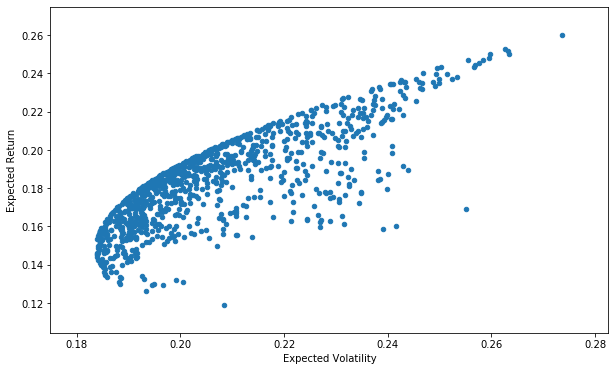

In [15]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

### The obtained curve is called 'Markowitz Efficient Frontier'. 

### This curve provides the risk-return relationship for our portfolio for various composition of weights. This can be useful in picking the optimal portfolio